## Cargar los datos

In [2]:
from Data import load_dataset_pair

(queryset1, dataset1) = load_dataset_pair("descriptores/MEL128", 21573, 33545, 128)
print("Q1={} R1={}".format(queryset1.shape, dataset1.shape))

(queryset2, dataset2) = load_dataset_pair("descriptores/SIFT", 2886, 202088, 128)
print("Q2={} R2={}".format(queryset2.shape, dataset2.shape))

(queryset3, dataset3) = load_dataset_pair("descriptores/VGG19", 842, 10171, 4096)
print("Q3={} R3={}".format(queryset3.shape, dataset3.shape))

datasets = [(queryset1, dataset1), (queryset2, dataset2), (queryset3, dataset3)]


Q1=(21573, 128) R1=(33545, 128)
Q2=(2886, 128) R2=(202088, 128)
Q3=(842, 4096) R3=(10171, 4096)


## Medir desempeño de los índices
Se construyen los índices y se prueban distintos parámetros para cada uno, se almacenan los resultados en arreglos.

In [3]:
from Index import Linear, KDTree, KMeansTree
from Results import obtener_curva


# construir el indice linear scan y buscar los NN
linear = Linear(dataset3)
print("construccion linear scan={:.1f}".format(linear.build_time))
lscan_dists, lscan_time = linear.search(queryset3)
print("busqueda linear scan={:.1f}".format(lscan_time))

# obtener curvas para KD-Tree
curvas_kdTree = []
leyenda_kdTree = []

# número de árboles a probar
num_trees = [5, 10, 20, 40, 60]
for trees in num_trees:
    
    # construir el indice KD-Tree
    kdtree = KDTree(dataset3, trees=trees)
    print('construccion {:d}-KDTree = {:.1f}'.format(trees, kdtree.build_time))

    # obtener curva y agregar al arreglo
    efectividad, eficiencia = obtener_curva(kdtree, queryset3, lscan_time, lscan_dists)
    curvas_kdTree.append([efectividad, eficiencia])
    leyenda_kdTree.append('KDTree con {:d} árboles'.format(trees))
    print('{:d} busquedas {:d}-KDTree = {:.1f}'.format(len(eficiencia) - 1, trees, sum(eficiencia) * lscan_time))

# obtener curvas para K-Means Tree
curvas_kmeans = []
leyenda_kmeans = []

# número de ramas a probar
num_branches = [5, 10, 15, 20, 30]
for branches in num_branches:
    
    # construir el indice K-Means Tree
    kmeanstree = KMeansTree(dataset3, branching=branches)
    print('construccion {:d}-KMeansTree = {:.1f}'.format(branches, kmeanstree.build_time))

    # obtener curva y agregar al arreglo
    efectividad, eficiencia = obtener_curva(kmeanstree, queryset3, lscan_time, lscan_dists)
    curvas_kmeans.append([efectividad, eficiencia])
    leyenda_kmeans.append('KMeansTree con {:d} ramas'.format(branches))
    print('{:d} busquedas {:d}-KMeansTree = {:.1f}'.format(len(eficiencia) - 1, branches, sum(eficiencia) * lscan_time))


construccion linear scan=0.0
busqueda linear scan=20.3
construccion 5-KDTree = 3.4
14 busquedas 5-KDTree = 34.8
construccion 10-KDTree = 6.7
13 busquedas 10-KDTree = 17.4
construccion 20-KDTree = 13.5
14 busquedas 20-KDTree = 40.6
construccion 40-KDTree = 27.1
13 busquedas 40-KDTree = 19.2
construccion 60-KDTree = 40.3
13 busquedas 60-KDTree = 19.8
construccion 5-KMeansTree = 22.0
11 busquedas 5-KMeansTree = 43.4
construccion 10-KMeansTree = 48.5
12 busquedas 10-KMeansTree = 37.5
construccion 15-KMeansTree = 41.2
12 busquedas 15-KMeansTree = 29.8
construccion 20-KMeansTree = 48.3
12 busquedas 20-KMeansTree = 26.7
construccion 30-KMeansTree = 90.9
13 busquedas 30-KMeansTree = 38.6


## Graficar los resultados

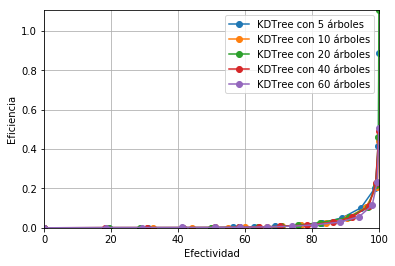

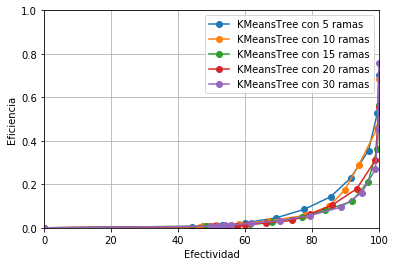

In [6]:
from Results import obtener_curva, graficar_curvas

# graficar los datos
graficar_curvas(curvas_kdTree, leyenda_kdTree)
graficar_curvas(curvas_kmeans, leyenda_kmeans)